In [1]:
%matplotlib inline

from pylab import *
import matplotlib.pyplot as plt


Initialisation
==============

* importing pyAgrum
* importing pyAgrum.lib tools
* loading a BN

In [5]:
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb

## Create a first BN : bn

In [6]:
bn=gum.loadBN("../resources/asia.bif")
# randomly re-generate parameters for every Conditional Probability Table
bn.generateCPTs() 
gnb.showBN(bn,size="3",format="svg")

## Create a second BN : bn2

In [7]:
bn2=gum.loadBN("../resources/asia.bif")
bn2.generateCPTs()
gnb.showBN(bn,size="3",format="svg")

## bn vs bn2 : different parameters

In [8]:
from IPython.display import HTML
HTML('<table><tr><td>a CPT in bn</td><td>same CPT in bn2</td></tr><tr><td>'+gnb.showPotential(bn.cpt(3),asString=True)
     +'</td><td><pre>'+gnb.showPotential(bn2.cpt(3),asString=True)+'</td></tr></table>')

## Exact and (Gibbs) approximated KL-divergence 

In order to compute KL-divergence, we just need to be sure that the 2 distributions are defined on the same domain (same variables, etc.)

<h3>Exact KL</h3>


In [9]:
g1=gum.BruteForceKL(bn,bn2)
print(g1.compute())

{'errorPQ': 0, 'hellinger': 0.7707509777846504, 'klQP': 2.058791529209497, 'bhattacharya': 0.35243897814889774, 'errorQP': 0, 'klPQ': 2.018255360174091}


If the models are not on the same domain :

In [10]:
bn_different_domain=gum.loadBN("../resources/alarm.dsl")

# g=gum.BruteForceKL(bn,bn_different_domain) # a KL-divergence between asia and alarm ... :(
#
# would cause
#---------------------------------------------------------------------------
#OperationNotAllowed                       Traceback (most recent call last)
#
#OperationNotAllowed: this operation is not allowed : KL : the 2 BNs are not compatible (not the same vars : visit_to_Asia?)

<h3>Gibbs-approximated KL</h3>

There is something wrong with <em>Bhattacharya</em> computations...


In [11]:
g=gum.GibbsKL(bn,bn2)
g.setVerbosity(True)
g.setMaxTime(120)
g.setBurnIn(5000)
g.setEpsilon(1e-7)
g.setPeriodSize(500)

In [12]:
print(g.compute())
print("Computed in {0} s".format(g.currentTime()))

{'errorPQ': 0, 'hellinger': 0.7776145551930753, 'klQP': 2.1505201067341226, 'bhattacharya': nan, 'errorQP': 0, 'klPQ': 2.0120025323514166}
Computed in 7.462797 s


--
stopped with epsilon=1e-07
--
Temps de calcul : 7.462797
Nombre d'itérations : 212000


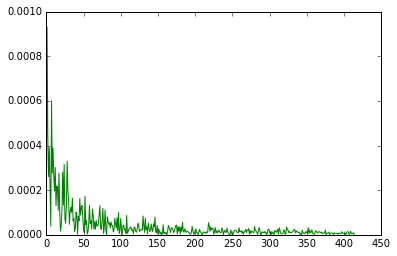

In [13]:
print("--")

print(g.messageApproximationScheme())
print("--")

print("Temps de calcul : {0}".format(g.currentTime()))
print("Nombre d'itérations : {0}".format(g.nbrIterations()))

p=plot(g.history(), 'g')

### Animation of Gibbs KL

Since it may be difficult to know what happens during approximation algorithm, pyAgrum allows to follow the iteration using animated matplotlib figure

In [14]:
g=gum.GibbsKL(bn,bn2)
g.setMaxTime(60)
g.setBurnIn(500)
g.setEpsilon(1e-7)
g.setPeriodSize(5000)

{'bhattacharya': nan,
 'errorPQ': 0,
 'errorQP': 0,
 'hellinger': 0.7730762721568044,
 'klPQ': 2.0166402549808313,
 'klQP': 2.0910066611761273}

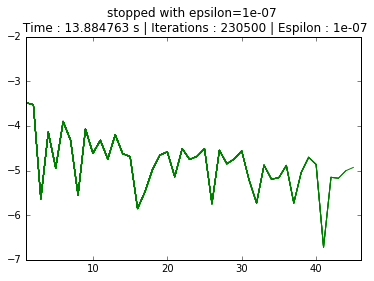

In [15]:
gnb.animApproximationScheme(g) # logarithmique scale for Y
g.compute()